In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from lab_processing import create_plot, print_errors

In [2]:
df = pd.read_csv('data/data.tsv', sep='\t')

In [3]:
df['x'] = 1 - np.cos(np.radians(df['theta']))
df['y'] = 1 / df['N']
df['y_err'] = df['err_N']/df['N'] * df['y']

<AxesSubplot:xlabel='x', ylabel='y'>

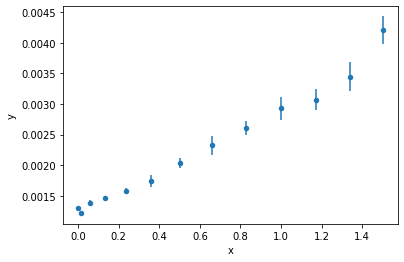

In [4]:
df.plot(x='x', y='y', kind='scatter', yerr=(df['y_err']))

In [5]:
apx, cov = np.polyfit(df['x'], df['y'], deg=1, w=1/df['y_err'], cov=True)

In [6]:
k = apx[0]
eps_k = np.sqrt(np.diag(cov))[0] / k

In [7]:
print_errors(apx, cov)


    Final set of parameters             Asymptotic Standard Error
    =======================             =========================
    
    k1 = 0.00166836167733933		+/- 7.1683e-05 (4.297%)
    k0 = 0.00123052289365456		+/- 1.6707e-05 (1.358%)



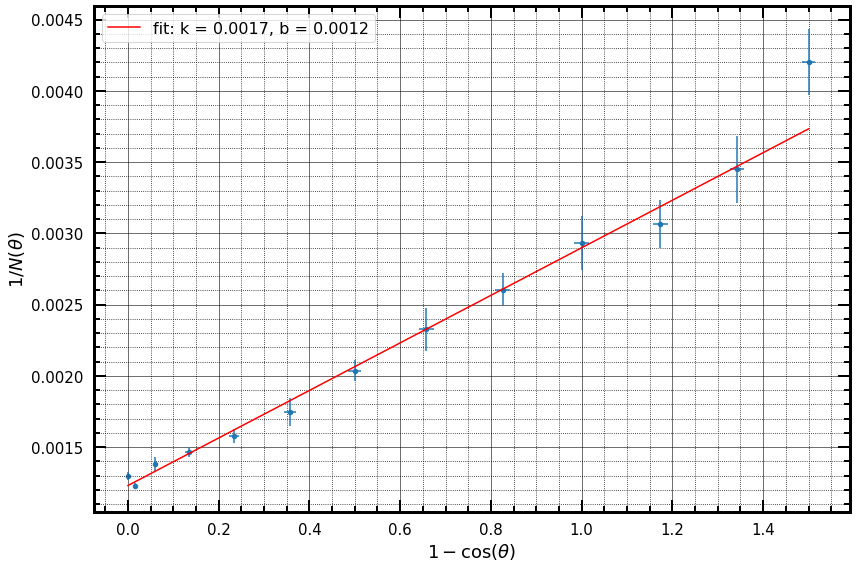

In [17]:
fig, ax = create_plot(12, 8)

x = np.linspace(0, df['x'].max(), 200)
ax.plot(x, np.polyval(apx, x), 'r-', label=f'fit: k = {apx[0]:.4f}, b = {apx[1]:.4f}')

df.plot(x='x', y='y', kind='scatter', xerr=0.017*np.sin(np.radians(df['theta'])), yerr=df['y_err'], ax=ax)

ax.set_xlabel(r'$1 - \cos( \theta )$', fontsize=18)
ax.set_ylabel(r'$1 / N( \theta )$', fontsize=18)
ax.legend(loc='upper left', fontsize=16)
ax.grid()

plt.tight_layout()
fig.savefig('graphs/plot.pdf')

In [9]:
def N(theta):
    x = 1 - np.cos(np.radians(theta))
    return 1 / np.polyval(apx, x)

In [10]:
N_90_eps = np.sqrt(np.sum(np.diag(cov))) / (apx.sum())
N_0_eps = np.sqrt(np.diag(cov))[0] / apx[0]

In [11]:
mc = 662 * N(90)/(N(0) - N(90))

In [12]:
# eps_N = eps_k

In [13]:
eps_znam =  1 / (N(0) - N(90)) * ((N_0_eps*N(0))**2 + (N_90_eps*N(90))**2) ** 0.5

In [14]:
eps_gnrl = (N_90_eps**2 + eps_znam**2)**0.5
eps_gnrl, eps_znam

(0.08104952647831591, 0.07696973185003535)

In [15]:
sig_gnrl = eps_gnrl * mc

In [16]:
mc, sig_gnrl

(488.26712256927294, 39.57381907916941)